## 간단한 EDA 및 전처리

### 데이터 살펴보기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('./train.csv', index_col=0)
train.head()

,text,target
id,,
0,"\nThey were, and even if Washington might cons...",10
1,"We run ""SpaceNews & Views"" on our STAREACH BBS...",14
2,\n\n\nNot to worry. The Masons have been demo...,19
3,"Only Brendan McKay, or maybe ARF, would come t...",17
4,Help: I am running some sample problems from O...,5


In [ ]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9233 non-null   object
 1   target  9233 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 216.4+ KB


In [ ]:
# 영어로 된 column들이 주를 이루고, target은 0~19까지 20개의 그룹이 존재
temp = train.target.unique()
np.sort(temp)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

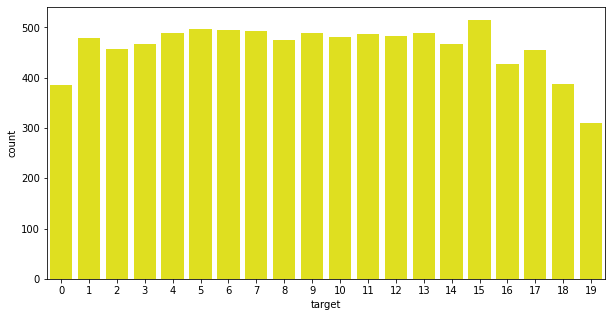

In [ ]:
# 그룹의 개수를 확인해본 결과, 그룹 별로 약간 차이가 있다는 것을 알 수 있다.
plt.figure(figsize=(10,5))
sns.countplot(x=train['target'], color='yellow')
plt.show()

In [ ]:
# 숫자로 살펴보면 다음과 같다
group_count = pd.DataFrame(train['target'].value_counts())
group_count.sort_values(by='target', ascending=False).head(10)

,target
15,515
5,496
6,494
7,493
13,490
9,490
4,490
11,488
12,483
10,482


#### test 데이터 살펴보기

In [ ]:
test = pd.read_csv('./test.csv', index_col=0)
test.head()

,text
id,
0,\nThe VL-IDE Adapter can be much faster then t...
1,\n\nYeah. In a fire that reportedly burned ho...
2,":Judge: ""I grant you immunity from whatever ma..."
3,"I, too, put a corbin seat on my Hawk. I got t..."
4,\n\nDo I ever!!!!!! After 2 years of having h...


In [ ]:
check_missing_col(test)

결측치가 존재하지 않습니다


[]

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9232
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9233 non-null   object
dtypes: object(1)
memory usage: 144.3+ KB


### 텍스트 전처리를 위해 train_data와 test_data 합치기

In [ ]:
# train과 test 모두 9233개의 문장을 가지고 있다...
print(f"train의 text 개수: {len(train.text)}")
print(f"test의 text 개수: {len(test.text)}")
total_X = pd.DataFrame(pd.concat([train.text, test.text], axis=0).reset_index(drop=True))
total_X

train의 text 개수: 9233
test의 text 개수: 9233


,text
0,"\nThey were, and even if Washington might cons..."
1,"We run ""SpaceNews & Views"" on our STAREACH BBS..."
2,\n\n\nNot to worry. The Masons have been demo...
3,"Only Brendan McKay, or maybe ARF, would come t..."
4,Help: I am running some sample problems from O...
...,...
18461,"\n\n\n\nIn Texas, you cannot carry a handgun. ..."
18462,"\n Yes, I want to concentrate on other develop..."
18463,\nAll I know is that the Megadrives worked per...
18464,\n\nOops! Quite right. I got so busy that I sa...


### Text 기초 전처리

In [ ]:
total_X.text

0        \nThey were, and even if Washington might cons...
1        We run "SpaceNews & Views" on our STAREACH BBS...
2        \n\n\nNot to worry.  The Masons have been demo...
3        Only Brendan McKay, or maybe ARF, would come t...
4        Help: I am running some sample problems from O...
                               ...                        
18461    \n\n\n\nIn Texas, you cannot carry a handgun. ...
18462    \n Yes, I want to concentrate on other develop...
18463    \nAll I know is that the Megadrives worked per...
18464    \n\nOops! Quite right. I got so busy that I sa...
18465    \nThis is actually more like the stuff from Ph...
Name: text, Length: 18466, dtype: object

In [ ]:
import re 

def clean_text(texts): 
  corpus = [] 
  for i in range(0, len(texts)): 

    review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
    review = re.sub(r'\d+','', review)#숫자 제거
    review = review.lower() #소문자 변환
    review = re.sub(r'\s+', ' ', review) #extra space 제거
    review = re.sub(r'<[^>]+>','',review) #Html tags 제거
    review = re.sub(r'\s+', ' ', review) #spaces 제거
    review = re.sub(r"^\s+", '', review) #space from start 제거
    review = re.sub(r'\s+$', '', review) #space from the end 제거
    review = re.sub(r'_', ' ', review) #space from the end 제거
    corpus.append(review) 
  
  return corpus

In [ ]:
# 문장이 원하는 대로 잘 전처리 되었음을 알 수 있다
total_X['text'] = clean_text(total_X['text'])
total_X.head()

,text
0,they were and even if washington might conside...
1,we run spacenews views on our stareach bbs a l...
2,not to worry the masons have been demonized an...
3,only brendan mckay or maybe arf would come to ...
4,help i am running some sample problems from or...


### Word2Vec으로 텍스트 전처리 1

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
cleaned_corpus = []
for sentence in total_X.text:
  filtered_tokens = [token for token in word_tokenize(sentence) if token.lower() not in stopwords]
  cleaned_corpus.append(' '.join(filtered_tokens))
  # 대문자 -> 소문자 변환해 stopwords 구분
  # 토큰이 stopword가 아닐 때 문장 내 토큰화 된 단어 토큰을 필터링 해 가져온다
  # stopword 제거한 문장 만들기

In [ ]:
w2v_input = [sentence.split() for sentence in cleaned_corpus]

In [ ]:
from gensim.models import Word2Vec
w2v = Word2Vec(sentences = w2v_input,
               size=200,
               window=15,
               min_count=10,
               negative=5,
               ns_exponent=0.75,
               workers=4,
               sample = 1e-3,
               alpha=0.0025,
               sg=1)

In [ ]:
wv = w2v.wv
vocabs = wv.vocab.keys()
word_vectors = [wv[v] for v in vocabs]

In [ ]:
print(f"word vector의 길이: {len(word_vectors)}")
print(f"첫번째 word vector: {word_vectors[0]}")

word vector의 길이: 15325
첫번째 word vector: [ 0.16975132  0.05653651 -0.04359956 -0.18257676 -0.15772074 -0.07496704
 -0.12635532 -0.01905724 -0.09863773  0.13592155 -0.12217352  0.05236813
 -0.24183466  0.09254232 -0.07518174  0.04535006 -0.00932571  0.17113785
 -0.17392875 -0.16803841  0.13973974  0.01449103 -0.10478568 -0.0262461
  0.09603346  0.10910717 -0.05784896  0.12299949 -0.1813302   0.10133342
  0.07349808  0.00283522 -0.01816949 -0.13931145  0.02316838 -0.12503764
 -0.17583327 -0.14798793  0.19299905 -0.23679632 -0.09832316 -0.03084596
 -0.08356352  0.22168833  0.03961027 -0.18024755 -0.15482615 -0.04619247
  0.05778762 -0.23313068 -0.07547976 -0.0784811   0.01125898  0.19977437
  0.05098709  0.11424465  0.06301117  0.01212241  0.1497311  -0.21549578
  0.1595585   0.1169357   0.06910782 -0.04943177  0.19623575  0.03338317
 -0.02811111 -0.18848097 -0.13115212 -0.05576948  0.23487729  0.0498963
  0.01455793  0.03285335  0.10514478 -0.09218422 -0.13574806 -0.0015454
  0.04502818  

In [ ]:
wv['fight']

array([ 0.08881187, -0.05172271, -0.00080132, -0.24492627, -0.10436126,
       -0.14539719, -0.1826418 ,  0.00767064, -0.03913536,  0.06563353,
       -0.13013506,  0.02463125, -0.26262024,  0.21173784, -0.07188763,
       -0.02097849, -0.11281903,  0.19753519, -0.18365622, -0.05698846,
        0.07423204, -0.08684541, -0.18157187, -0.03835689,  0.10088757,
        0.19389643,  0.04919622, -0.01892773, -0.17498869,  0.00401235,
        0.23299058, -0.03197184, -0.05862563, -0.11681385,  0.00574673,
       -0.25913313, -0.20736104, -0.13473684,  0.14120248, -0.21614167,
       -0.15868534, -0.00399566,  0.00283933,  0.23345384,  0.03114569,
       -0.20376116, -0.06552444, -0.01222756,  0.12861596, -0.183237  ,
       -0.00056711, -0.08116344,  0.00091582,  0.20424916, -0.00873775,
        0.18095273,  0.09463473,  0.06870015,  0.16051073, -0.08106659,
        0.08404507,  0.08244555,  0.06994355, -0.09192064,  0.11195002,
        0.0083977 , -0.07354548, -0.17979363, -0.15420826, -0.05

In [ ]:
wv.most_similar(positive='fight', topn=5)

[('fired', 0.9967003464698792),
 ('hitler', 0.9961013197898865),
 ('murdered', 0.9958621859550476),
 ('party', 0.9958453178405762),
 ('violence', 0.9958148002624512)]

### W2V를 이용한 텍스트 전처리 2

In [ ]:
import os
import sys

import numpy as np
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import tensorflow as tf
tf.random.set_seed(1)
np.random.seed(1)

In [ ]:
text = total_X.text.tolist()
y_train = train['target'].tolist()

In [ ]:
t = Tokenizer()
t.fit_on_texts(text)
vocab_size = len(t.word_index) + 1
encoded_docs = t.texts_to_sequences(text)

def get_max_length(df):
  max_length = 0
  for row in df['text']:
    if len(row.split(" ")) > max_length:
      max_length = len(row.split(" "))
  return max_length

max_length = get_max_length(total_X)
print(max_length)

padded_text = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

11459


In [ ]:
padded_text[0]

array([25, 50,  5, ...,  0,  0,  0], dtype=int32)

In [ ]:
labels = np.array(to_categorical(y_train))
print(f'첫 번째 라벨: {labels[0]}')

첫 번째 라벨: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
embeddings_index = dict()
keys = list(vocabs)
for i in range(len(word_vectors)):
  key = keys[i]
  embeddings_index[key] = word_vectors[i]

In [ ]:
embedding_matrix = zeros([vocab_size, 200])
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

### Train set과 test set으로 다시 나누기

In [ ]:
X_train = padded_text[:9233]
X_test = padded_text[9233:]
y_train = labels

## 모델 만들기

In [ ]:
model1 = Sequential()
e = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=max_length, trainable=True)
model1.add(e)
model1.add(Flatten())
model1.add(Dense(20, activation='softmax'))

model1.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=30)
# mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
model1.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
289/289 [==============================] - 96s 322ms/step - loss: 2.9553 - accuracy: 0.1985
Epoch 2/20
289/289 [==============================] - 93s 322ms/step - loss: 1.3073 - accuracy: 0.5944
Epoch 3/20
289/289 [==============================] - 93s 322ms/step - loss: 0.6253 - accuracy: 0.8413
Epoch 4/20
289/289 [==============================] - 93s 321ms/step - loss: 0.3227 - accuracy: 0.9386
Epoch 5/20
289/289 [==============================] - 93s 321ms/step - loss: 0.1848 - accuracy: 0.9699
Epoch 6/20
289/289 [==============================] - 93s 321ms/step - loss: 0.1294 - accuracy: 0.9813
Epoch 7/20
289/289 [==============================] - 93s 321ms/step - loss: 0.0930 - accuracy: 0.9851
Epoch 8/20
289/289 [==============================] - 93s 321ms/step - loss: 0.0749 - accuracy: 0.9868
Epoch 9/20
289/289 [==============================] - 93s 321ms/step - loss: 0.0625 - accuracy: 0.9892
Epoch 10/20
289/289 [==============================] - 93s 321ms/step - l

In [ ]:
model2 = Sequential()
e = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=max_length, trainable=True)
model2.add(e)
model2.add(LSTM(200))
model2.add(Dense(20, activation='softmax'))

model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# model2.fit(X_train, y_train, epochs=20, verbose=1)

## 결과 예측하기 

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
9228,9228,0
9229,9229,0
9230,9230,0
9231,9231,0


In [ ]:
preds = model1.predict(X_test)
predictions = np.argmax(preds, axis=1)
submission['target'] = predictions

In [ ]:
submission

,id,target
0,0,3
1,1,16
2,2,12
3,3,8
4,4,13
...,...,...
9228,9228,18
9229,9229,5
9230,9230,7
9231,9231,8


In [ ]:
submission.to_csv('word2vec3.csv', index = False)